##### 토픽 모델링
##### LDA : 문서 컬렉션에서 숨겨진 주제를 찾아내는 생성형 모델
- document : 여러 topics의 혼합
- topic : 여러 word의 분포
- word : 특정 topic에서 생성된 단어
- 문서들은 topic의 혼합으로 구성
    - 뉴스기사
        -  70% 정치 20% 경제 10% 스포츠
    - 토픽은 단어 분포를 갖는다
        - 정치 {선거:0.2, 대통령:0.15, 정부:0.1 ...}
        - 경제 {주식:0.25, 금리:0.2, 은행:0.15 ...}
-  모든 문서를 토픽의 혼합, 토픽별 단어 분포를 랜덤하게 초기화
    - 과정을 반복하면
        - 각 단어가 어떤 토픽에서 나왔는지 추정
        - 각 문서의 토픽비율을 업데이트
        - 각 토픽의 단어 분포를 업데이트

In [69]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
documents = [
    "Python 프로그래밍은 매우 강력하고 배우기 쉬워요",
    "머신러닝은 인공지능의 핵심 기술입니다",
    "자연어처리는 NLP라고도 불립니다",
    "딥러닝은 신경망을 이용한 학습 방법입니다",
    "데이터 분석은 통계학에 기반합니다",
    "파이썬으로 머신러닝 모델을 만들 수 있습니다",
    "인공지능 기술은 빠르게 발전하고 있습니다",
    "자연어처리 모델은 텍스트를 이해할 수 있어요"
]

# 단어 벡터화
from konlpy.tag import Okt
cv = CountVectorizer(
    max_features=50, 
    stop_words=['은','는','이','가','을','를','그','그리고'],
    min_df=1,
    max_df=0.9
)
doc_term_matrix = cv.fit_transform(documents)
feature_names = cv.get_feature_names_out()
print(f'문서 단어 행렬: {doc_term_matrix.shape}')
print(f'단어 목록: {feature_names}, 단어 목록 갯수: {len(feature_names)}')

문서 단어 행렬: (8, 36)
단어 목록: ['nlp라고도' 'python' '강력하고' '기반합니다' '기술은' '기술입니다' '데이터' '딥러닝은' '만들' '매우'
 '머신러닝' '머신러닝은' '모델은' '모델을' '발전하고' '방법입니다' '배우기' '분석은' '불립니다' '빠르게' '쉬워요'
 '신경망을' '이용한' '이해할' '인공지능' '인공지능의' '있습니다' '있어요' '자연어처리' '자연어처리는' '텍스트를'
 '통계학에' '파이썬으로' '프로그래밍은' '학습' '핵심'], 단어 목록 갯수: 36


In [70]:
# LDA 모델 생성
lda_model = LatentDirichletAllocation(
    n_components=3, # 토픽(주제) 개수
    random_state=42,
    max_iter=20,
    learning_method='online' # batch (모든 데이터를 한번에 다 써서 한번학습), online(미니배치)
)
# 모델 학습
lda_output = lda_model.fit_transform(doc_term_matrix)
print(f'문서- 주제 행렬 : {lda_output.shape}')
print(f'첫번쨰 문서의 주제 분포')
print(f'Topic 0: {lda_output[0,0]:.4f}')
print(f'Topic 1: {lda_output[0,1]:.4f}')
print(f'Topic 2: {lda_output[0,2]:.4f}')

# 각 주제별로 상위 단어 출력
def display_topic(model, feature_names, n_top_words=5):
    print(f'각 주제별 상위 단어----')
    for topic_idx, topic in enumerate(model.components_):
        # 가장 높은 가중치를 가진 단어의 인덱스 호출
        top_words_idx = topic.argsort()[-n_top_words:][::-1]
        top_words = [ feature_names[i] for i in top_words_idx ]
        top_weights = [ topic[i] for i in top_words_idx ]
        print(f'[topic {topic_idx}]')
        for word, weight in zip(top_words, top_weights):
            print(f'{word} : {weight:.4f}')
        print()

display_topic(lda_model, feature_names, n_top_words=5)

문서- 주제 행렬 : (8, 3)
첫번쨰 문서의 주제 분포
Topic 0: 0.0481
Topic 1: 0.0483
Topic 2: 0.9036
각 주제별 상위 단어----
[topic 0]
기술은 : 1.3185
모델은 : 1.3178
핵심 : 1.3125
인공지능 : 1.3124
기술입니다 : 1.3116

[topic 1]
있습니다 : 1.3128
모델을 : 1.3109
데이터 : 1.3104
분석은 : 1.3095
머신러닝 : 1.3091

[topic 2]
매우 : 1.3191
강력하고 : 1.3182
python : 1.3135
nlp라고도 : 1.3131
배우기 : 1.3099



In [71]:
# 각 문서의 주요 주제
print(f'각문서의 주요 주제--------------')
for doc_idx, doc in enumerate(lda_output):
    main_topic = np.argmax(doc)
    confidence = doc[main_topic]
    print(f'문서:{doc_idx} topic: {main_topic} 비율: {confidence:.4f}')
    print(f'원문: {documents[doc_idx]}')
    print()

각문서의 주요 주제--------------
문서:0 topic: 2 비율: 0.9036
원문: Python 프로그래밍은 매우 강력하고 배우기 쉬워요

문서:1 topic: 0 비율: 0.8650
원문: 머신러닝은 인공지능의 핵심 기술입니다

문서:2 topic: 2 비율: 0.8312
원문: 자연어처리는 NLP라고도 불립니다

문서:3 topic: 2 비율: 0.8876
원문: 딥러닝은 신경망을 이용한 학습 방법입니다

문서:4 topic: 1 비율: 0.8655
원문: 데이터 분석은 통계학에 기반합니다

문서:5 topic: 1 비율: 0.8867
원문: 파이썬으로 머신러닝 모델을 만들 수 있습니다

문서:6 topic: 0 비율: 0.8855
원문: 인공지능 기술은 빠르게 발전하고 있습니다

문서:7 topic: 0 비율: 0.8876
원문: 자연어처리 모델은 텍스트를 이해할 수 있어요



In [72]:
# 청와대 국민청원 데이터로드
import os
import urllib.request
import ssl
url = 'https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_sampled.csv'

# ssl 인증서 무시
ssl._create_default_https_context = ssl._create_unverified_context

urllib.request.urlretrieve(url, './sample.csv')

('./sample.csv', <http.client.HTTPMessage at 0x1b524399190>)

In [73]:
import pandas as pd
df = pd.read_csv('sample.csv', nrows=1000) # 실행속도떄문에 제한
df.head()

,article_id,start,end,answered,votes,category,title,content
0,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
1,63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...
3,141,2017-08-20,2017-08-27,0,0,기타,한국문화에 창조적요소를 심자,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...
4,148,2017-08-20,2017-11-18,0,7,외교/통일/국방,다문화정책 및 할랄 인증 제도,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...


In [74]:
df.shape

(1000, 8)

In [75]:
# 한국어 전처리
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
okt = Okt()
# 명사만, 그리고 한글자 이상만
def tokenizer(doc):
    return [ token for token in okt.nouns(doc) if len(token) > 1]
    
cv = CountVectorizer(
    max_features=10000, 
    stop_words=['은','는','이','가','을','를','그','그리고'],
    min_df=5,
    max_df=0.5,
    tokenizer=tokenizer
)
pet_cv = cv.fit_transform(df.content)
print(f'countervectorize 형태: {pet_cv.shape}')

c:\Users\playdata2\miniconda3\envs\deep\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


countervectorize 형태: (1000, 1827)


In [76]:
len(df.category.unique())

17

In [77]:
# LDA  모델 학습
from sklearn.decomposition import LatentDirichletAllocation
import time
# 시간측정
start_time = time.time()
lda =  LatentDirichletAllocation(n_components=15
                          ,n_jobs=-1
                          ,random_state=42
                          )
pet_topics =  lda.fit_transform(pet_cv)
elapsed_time = time.time() - start_time
print(f'lda 학습시간 : {elapsed_time:.2f}초')

lda 학습시간 : 0.93초


In [84]:
# 토픽단어 출력함수
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}: ", end='')
        top_indices = topic.argsort()[:-n_top_words-1:-1]
        top_words = [feature_names[i] for i in top_indices]
        print(", ".join(top_words))
feature_names = cv.get_feature_names_out()
print_top_words(lda, feature_names,15)   

Topic #0: 대통령, 문재인, 러시아, 정부, 북한, 한국, 협력, 문제, 중국, 관계, 한반도, 미국, 대화, 추진, 통해
Topic #1: 생각, 수도, 국민, 차량, 나라, 대한민국, 신고, 확인, 안전, 사고, 사람, 서울, 대해, 지금, 행정
Topic #2: 보험, 건강, 사람, 소득, 국민, 제도, 생각, 정책, 보험료, 기준, 아이, 적용, 정부, 근로자, 의료
Topic #3: 분양, 조합원, 조합, 아파트, 주택, 실수, 토지, 집행, 세대, 공사, 대출, 상태, 처리, 강제, 지구
Topic #4: 학교, 학생, 교육, 교실, 아이, 문제, 때문, 업무, 초등, 운영, 지자체, 제도, 생활, 선생님, 여성
Topic #5: 생각, 전쟁, 우리, 북한, 훈련, 나라, 국방, 대한민국, 여자, 남자, 사람, 의무, 지금, 군대, 국민
Topic #6: 청소년, 보호, 폐지, 아이, 생각, 처벌, 사건, 피해자, 범죄, 소년법, 폭행, 가해자, 여중생, 부산, 사람
Topic #7: 관리, 아파트, 교육, 수업, 제대로, 사건, 아이, 수사, 매우, 사교육, 수준, 학원, 국가, 경찰, 여러분
Topic #8: 교사, 보육, 병원, 저희, 아이, 근무, 연락, 어린이집, 인상, 지금, 신고, 내용, 공무원, 마음, 댓글
Topic #9: 정말, 생각, 사람, 청원, 유치원, 국민, 나라, 개선, 문제, 경우, 민원, 아이, 대통령, 대한, 국가
Topic #10: 사업, 여성, 문제, 기업, 주민, 문화, 한국, 생각, 대통령, 대한민국, 현재, 대한, 병역, 건설, 위해
Topic #11: 회사, 의무, 보험, 계약, 경우, 대한, 주택, 지금, 헌법, 대출, 장애인, 업체, 차별, 위반, 대통령
Topic #12: 국민, 경찰, 지역, 대한민국, 대통령, 센터, 우리, 조직, 위해, 운영, 정부, 아동, 사건, 지금, 생각
Topic #13: 교사, 학교, 기간, 학생, 학교폭력, 경찰, 시험, 임용, 강사, 정규직, 사건, 관련, 조사

In [79]:
# 토픽 트랜드 분석
# 시간 정보 추출
df['period'] = pd.to_datetime(df['start']).dt.strftime('%Y-%m')
# 토픽 데이터 프레임
topic_columns = [f'Topic{i+1}' for i in range(15)]
trend_data = pd.DataFrame(pet_topics,columns=topic_columns)
trend_data['period'] = df['period'].values
trend_data.head(3)

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,period
0,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.037943,0.958618,0.000265,0.000265,0.000265,2017-08
1,0.000673,0.506020,0.201157,0.000673,0.000673,0.073135,0.000673,0.000673,0.000673,0.212280,0.000673,0.000673,0.000673,0.000673,0.000673,2017-08
2,0.001258,0.001258,0.001258,0.001258,0.415645,0.001258,0.001258,0.166387,0.076236,0.283663,0.001258,0.001258,0.045491,0.001258,0.001258,2017-08


In [80]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


기간별 토픽 분포:
           Topic1    Topic2    Topic3    Topic4    Topic5    Topic6    Topic7  \
period                                                                          
2017-08  0.077426  0.079663  0.113454  0.005648  0.063171  0.025692  0.028078   
2017-09  0.028448  0.040693  0.053249  0.016756  0.061131  0.049186  0.455711   
2017-10  0.046990  0.003758  0.168315  0.003829  0.077879  0.085076  0.010014   

           Topic8    Topic9   Topic10   Topic11   Topic12   Topic13   Topic14  \
period                                                                          
2017-08  0.009263  0.164414  0.101413  0.079849  0.094551  0.020430  0.091786   
2017-09  0.027469  0.036514  0.063799  0.042228  0.031716  0.033391  0.035640   
2017-10  0.143926  0.046710  0.095523  0.032154  0.018821  0.144117  0.077604   

          Topic15  
period             
2017-08  0.045163  
2017-09  0.024070  
2017-10  0.045282  


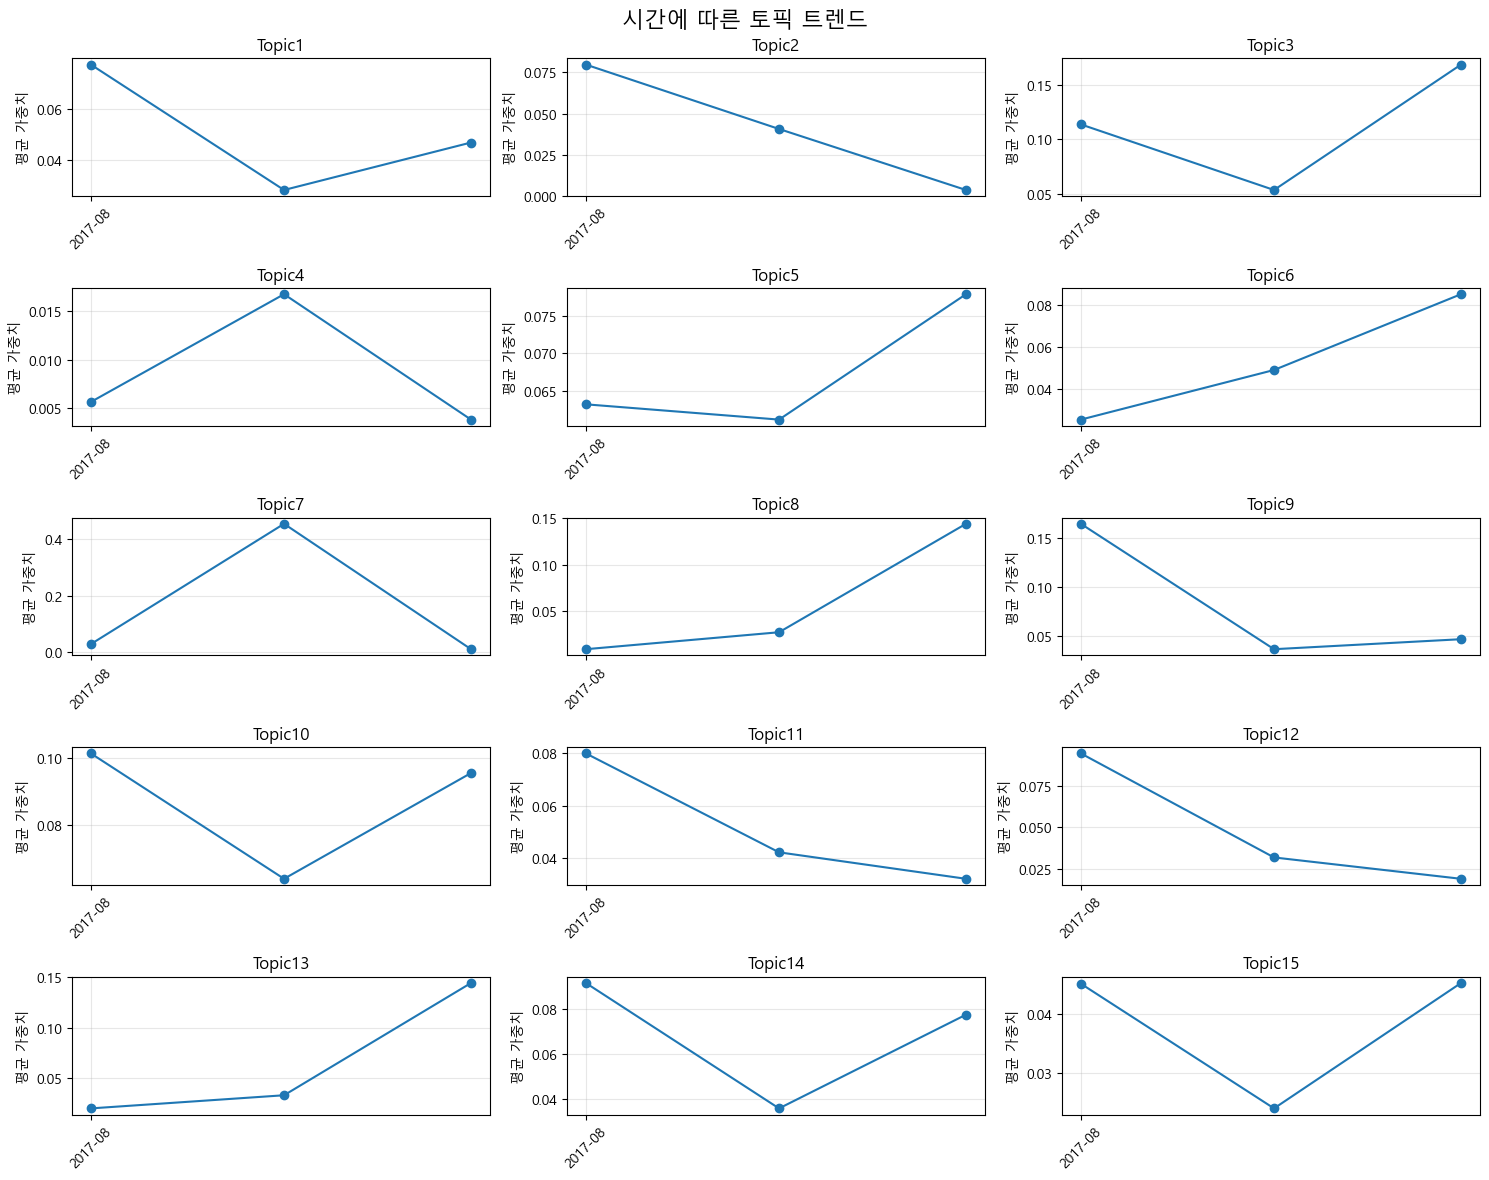

In [81]:
# 기간별 평균 토픽 가중치 계산
trend = trend_data.groupby('period').mean()

print("\n기간별 토픽 분포:")
print(trend.head())

# 시간 트렌드 시각화
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axes = plt.subplots(5, 3, figsize=(15, 12))
fig.suptitle('시간에 따른 토픽 트렌드', fontsize=16)

# x축을 datetime으로 변환
trend.index = pd.to_datetime(trend.index)
trend_sorted = trend.sort_index()

for idx, (ax, topic) in enumerate(zip(axes.flat, topic_columns)):
    ax.plot(trend_sorted.index, trend_sorted[topic], marker='o')
    ax.set_title(topic)
    ax.set_ylabel('평균 가중치')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [85]:
print_top_words(lda, feature_names,15)

Topic #0: 대통령, 문재인, 러시아, 정부, 북한, 한국, 협력, 문제, 중국, 관계, 한반도, 미국, 대화, 추진, 통해
Topic #1: 생각, 수도, 국민, 차량, 나라, 대한민국, 신고, 확인, 안전, 사고, 사람, 서울, 대해, 지금, 행정
Topic #2: 보험, 건강, 사람, 소득, 국민, 제도, 생각, 정책, 보험료, 기준, 아이, 적용, 정부, 근로자, 의료
Topic #3: 분양, 조합원, 조합, 아파트, 주택, 실수, 토지, 집행, 세대, 공사, 대출, 상태, 처리, 강제, 지구
Topic #4: 학교, 학생, 교육, 교실, 아이, 문제, 때문, 업무, 초등, 운영, 지자체, 제도, 생활, 선생님, 여성
Topic #5: 생각, 전쟁, 우리, 북한, 훈련, 나라, 국방, 대한민국, 여자, 남자, 사람, 의무, 지금, 군대, 국민
Topic #6: 청소년, 보호, 폐지, 아이, 생각, 처벌, 사건, 피해자, 범죄, 소년법, 폭행, 가해자, 여중생, 부산, 사람
Topic #7: 관리, 아파트, 교육, 수업, 제대로, 사건, 아이, 수사, 매우, 사교육, 수준, 학원, 국가, 경찰, 여러분
Topic #8: 교사, 보육, 병원, 저희, 아이, 근무, 연락, 어린이집, 인상, 지금, 신고, 내용, 공무원, 마음, 댓글
Topic #9: 정말, 생각, 사람, 청원, 유치원, 국민, 나라, 개선, 문제, 경우, 민원, 아이, 대통령, 대한, 국가
Topic #10: 사업, 여성, 문제, 기업, 주민, 문화, 한국, 생각, 대통령, 대한민국, 현재, 대한, 병역, 건설, 위해
Topic #11: 회사, 의무, 보험, 계약, 경우, 대한, 주택, 지금, 헌법, 대출, 장애인, 업체, 차별, 위반, 대통령
Topic #12: 국민, 경찰, 지역, 대한민국, 대통령, 센터, 우리, 조직, 위해, 운영, 정부, 아동, 사건, 지금, 생각
Topic #13: 교사, 학교, 기간, 학생, 학교폭력, 경찰, 시험, 임용, 강사, 정규직, 사건, 관련, 조사